<a href="https://colab.research.google.com/github/SHplusR/MAI-ML/blob/main/hyol_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Í∏∞Î≥∏ ÌôòÍ≤ΩÏÑ§Ï†ï**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
import re
import numpy as np

In [ ]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

pg_path = '/content/packages'

os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', pg_path)
sys.path.insert(0, pg_path)

Mounted at /content/drive


In [ ]:
from konlpy.tag import Okt

In [ ]:
#22Î≤àÏ§Ñ ÌïòÎ©¥ ÏïàÌï¥ÎèÑÎê©ÎãàÎã§. ÌòπÏãú Î™®Î•¥Îãà ÎÇ®Í≤®ÎÜìÏäµÎãàÎã§
!pip install --target=$my_path konlpy

In [ ]:
#22Î≤àÏ§Ñ ÌïòÎ©¥ ÏïàÌï¥ÎèÑÎê©ÎãàÎã§.ÌòπÏãú Î™®Î•¥Îãà ÎÇ®Í≤®ÎÜìÏäµÎãàÎã§
!pip install --target=$my_path git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-dn_fgsfv
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-dn_fgsfv
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 671.4 MB 1.5 kB/s 
  Using cached h5py-3.1.0-cp37-cp37m-manylinux1_x86_64.whl (4.0 MB)
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached wheel-0.37.1-py2.p

In [ ]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÎïå Ïù¥ÎØ∏ Î∂ÑÌï¥Î•º ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÌïÑÏöîÏóÜÏäµÎãàÎã§Îßå ÌòπÏãú Î™∞Îùº ÎÇ®Í≤®Îë°ÎãàÎã§
from pykospacing import Spacing

KeyboardInterrupt: ignored

## **ÌååÏùºÎ∂àÎü¨Ïò§Í∏∞ Î∞è ÌôïÏù∏**

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/data/final_nonnil_s.csv'

In [ ]:
data = pd.read_csv(filename)
data.head()

id                                             review  label
0   0                          Îàà Îò•Í∑∏ÎûÄ Í∞ÑÌò∏ÏÇ¨Îãò ÎÑò ÏπúÏ†àÌï¥Ïöî....Ïù¥ÏÅòÏãúÍµ¨      1
1   1            ÏÇ¨ÎßàÍ∑ÄÎπºÎü¨Í∞îÎäîÎç∞ ÏûòÌï¥Ï£ºÏÖ®ÏäµÎãàÎã§ÏÉÅÎã¥Ìï¥Ï£ºÎäî Í∞ÑÌò∏ÏÇ¨ÎãòÏù¥ ÏπúÏ†àÌï¥ÏÑú ÎçîÏ¢ãÏïòÏäµÎãàÎã§      1
2   2                          „Öã„Öã„ÖãÎ≠êÏïº Î∞ëÏóê Î¶¨Î∑∞ÏûëÏóÖÌïòÎÑ§ ÎÑò Ìã∞ÎÇòÏûêÎÇò ~~      0
3   3  Ïù¥ Î≥ëÏõêÏóêÏÑú Í∑ºÎ¨¥ÌïòÎäî Ï†ïÍ∏∞ÏÑù ÍµêÏàò üê∂ü¶ÖÎÅº Ïôú Ïã§ÎÇ¥&ÎåÄÏ§ëÍµêÌÜµ ÎßàÏä§ÌÅ¨ ÏùòÎ¨¥ Ï∞©Ïö© Ï†ÑÎ©¥ ...      0
4   4  Îã§Îì§ ÎòëÍ∞ôÏäµÎãàÎã§!ÌóàÎÇò ÎáåÏ¢ÖÏñëÏùÄ Ï≤òÏùå ÏàòÏà†ÌïòÏã†Î∂ÑÏù¥ Îã§Î•∏Ï™ΩÏóêÏûàÎã§Í∞Ä Í∑∏Ï™ΩÏúºÎ°ú Í∞ÄÏÖîÏÑú!Ï†ÄÎòê...      0

In [ ]:
type(data)

pandas.core.frame.DataFrame

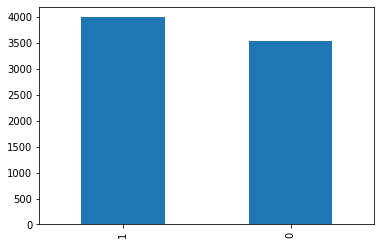

In [ ]:
data['label'].value_counts().plot(kind='bar')

In [ ]:
print(data.isnull().values.any())

False


## Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞ ( train, test, val ) and Îç∞Ïù¥ÌÑ∞ **Ï†ïÏ†úÏûëÏóÖ**

In [ ]:
data.drop_duplicates(subset = ['review'], inplace=True) # review Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏ†Å ÎÇ¥Ïö©ÏùÄ Ï†úÍ±∞
data['review'] = data['review'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","") # ÌïúÍ∏Ä ÎπºÍ≥† Îã§ ÏÇ≠Ï†ú
data['review'] = data['review'].str.replace('^ +', "") # Í≥µÎ∞± -> empty
data['review'].replace('', np.nan, inplace=True) # Í≥µÎ∞± -> nil
data = data.dropna(how='any') # Null Í∞í Ï†úÍ±∞
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò :',len(data))

Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò : 7149


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.model_selection import train_test_split

target = data['label']

train_data, test_data, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

print(len(train_data))
print(len(test_data))


5719
1430


In [ ]:
print(len(y_test))
print(y_test.isnull().values.any())

1430
False


In [ ]:
okt = Okt()
X_train = []
stopwords = ['Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Îì§', 'Îäî', 'Ï¢Ä', 'Ïûò', 'Í±ç', 'Í≥º', 'ÎèÑ', 'Î•º', 'ÏúºÎ°ú', 'Ïûê', 'Ïóê', 'ÏôÄ', 'Ìïú', 'ÌïòÎã§','Î°ú','Í≤É','Í≥†','Ïõê']
for sentence in tqdm(train_data['review']):
    tokenized_sentence = okt.morphs(str(sentence), stem=True) # ÌÜ†ÌÅ∞Ìôî
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    X_train.append(stopwords_removed_sentence)
print(X_train[:3])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5719/5719 [00:45<00:00, 124.38it/s]

[['Î∂ÅÌïú', 'ÏÇ∞', 'Îòê', 'Îã§Î•∏', 'Î™®Ïäµ', 'ÏùÑ', 'Î≥º', 'Ïàò', 'ÏûàÎã§', 'Ï¢ãÎã§'], ['Î∞©Ïù¥', 'Îùº', 'Ï†ÅÌûàÎã§', 'ÏòõÎÇ†', 'Ïò§ÎùΩÏã§', 'ÏÜêÎãò', 'ÎßéÎã§', 'ÏÇ¨Ïû•', 'Îãò', 'ÏπúÏ†àÌïòÎã§', 'Ïã¨'], ['Ï°∏ÏóÖ', 'Ïó¨Ï†ÑÌïòÎã§', 'Í∑∏Î¶ΩÎã§', 'Í≥≥']]


In [ ]:
X_test = []
for sentence in tqdm(test_data['review']):
    tokenized_sentence = okt.morphs(str(sentence), stem=True) # ÌÜ†ÌÅ∞Ìôî
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    X_test.append(stopwords_removed_sentence)
print(X_test[:3])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1430/1430 [00:07<00:00, 180.09it/s]

[['Í∑∏ÏßÄÍ∞ôÎã§', 'ÌîºÏãúÎ∞©', 'Îß®ÎÇ†', 'Ïã†Î∂ÑÏ¶ù', 'ÌôïÏù∏', 'Ìïò', 'ÌîºÏãúÎ∞©', 'ÏûÑ', 'Í∞ÄÏßÄ', 'ÎßêÎã§', 'ÏãúÏÑ§', 'Íµ¨Î¶¨', 'ÏùåÏãù', 'ÎßõÏóÜÎã§', 'ÏïåÎ∞îÏÉù', 'Î∂ÄÌÑ∞Í∞Ä', 'Ï†Ñ', 'ÎÇò', 'Ïã∏Í∞ÄÏßÄ', 'ÏóÜÎã§', 'ÎàÑÍ∞Ä', 'Í∞ÄÎã§'], ['ÏÇ¨Ïû•', 'Îãò', 'ÏπúÏ†àÌïòÎã§', 'ÏïåÎ∞î', 'ÏπúÏ†à', 'Î∞©', 'Íπ®ÎÅóÌïòÎã§', 'Î®πÎã§', 'ÎßéÎã§', 'Ï¢ãÎã§', 'Í∑ºÎç∞', 'ÌôîÏû•Ïã§', 'ÎçîÎüΩÎã§', 'Î≥ÄÍ∏∞', 'ÏÇ¨Ïö©', 'ÌûòÎì§Îã§'], ['Ïôú', 'Ïù¥Î†áÍ≤å', 'Î∂àÏπúÏ†àÌïòÎã§', '„Ö†„Ö†', 'ÌòºÎÇòÎã§', 'Í∞Ñ', 'Í∏∞Î∂Ñ', 'Ïù¥ÎÑ§', 'Ïöî']]


# **Ï†ïÏàòÏù∏ÏΩîÎî©**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'ÏûàÎã§': 1, 'Ï¢ãÎã§': 2, 'ÏùÑ': 3, 'ÏóÜÎã§': 4, 'Î≥¥Îã§': 5, 'Í∞ÄÎã§': 6, 'Ïïà': 7, 'ÏπúÏ†àÌïòÎã§': 8, 'ÎÑàÎ¨¥': 9, 'Î∂Ñ': 10, 'ÏóêÏÑú': 11, 'ÏßÅÏõê': 12, 'ÏãúÍ∞Ñ': 13, 'ÎêòÎã§': 14, 'Îã§': 15, 'Ïù¥Îã§': 16, 'Î∞õÎã§': 17, 'ÏÇ¨Îûå': 18, 'Í≥≥': 19, 'Îßå': 20, 'ÏïäÎã§': 21, 'ÎßéÎã§': 22, 'Í∞ôÎã§': 23, 'Î≥ëÏõê': 24, 'ÏïÑÎãàÎã§': 25, 'ÌïòÍ≥†': 26, 'Ìï¥Ï£ºÎã§': 27, 'Ïò§Îã§': 28, 'Îïå': 29, 'Ïöî': 30, 'Îã§Î•∏': 31, 'Îãò': 32, 'Ïó¨Í∏∞': 33, 'ÏûêÎã§': 34, 'Ïùº': 35, 'ÏßÑÎ£å': 36, 'Î™ª': 37, 'ÏßÑÏßú': 38, 'Îßê': 39, 'ÏùòÏÇ¨': 40, 'Í∑∏': 41, 'Ï±Ö': 42, 'ÎÇòÏò§Îã§': 43, 'Ï†Å': 44, 'ÏïàÎêòÎã§': 45, 'ÏïåÎã§': 46, 'Í∑∏Î†áÎã§': 47, 'ÎÇò': 48, 'Îì§Îã§': 49, 'ÏÑú': 50, 'Ïàò': 51, 'Î®πÎã§': 52, 'Ï†ïÎßê': 53, 'Í∑∏ÎÉ•': 54, 'ÍπåÏßÄ': 55, 'Ïãú': 56, 'ÎÇ¥': 57, 'Î∂ÑÎì§': 58, 'Ï§ë': 59, 'Ìï®': 60, 'Î∂àÏπúÏ†àÌïòÎã§': 61, 'Îçî': 62, 'Î™®Î•¥Îã§': 63, 'Ïù∏': 64, 'ÏòÅÌôî': 65, 'Ïôú': 66, 'Ï£ºÏ∞®': 67, 'ÌôòÏûê': 68, 'Ï†ïÎèÑ': 69, 'Í∞ÑÌò∏ÏÇ¨': 70, 'ÎßõÏûàÎã§': 71, 'Ïã∂Îã§': 72, 'Ìïò': 73, 'Ïù∏Îç∞': 74, 'ÎßéÏù¥': 7

In [ ]:
# ÎπàÎèÑ ÌöüÏàòÍ∞Ä 1Ìöå Ïù¥ÌïòÎäî Ï†úÍ±∞ÌïòÍ∏∞

threshold = 2
total_cnt = len(tokenizer.word_index) # Îã®Ïñ¥ Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàò
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÑ Îïå
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :',total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 11635
Îì±Ïû• ÎπàÎèÑÍ∞Ä 1Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 5472
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 47.030511388053284
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 4.6241602230954495


In [ ]:
vocab_size = total_cnt - rare_cnt + 1
print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ :',vocab_size)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ : 6164


In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print(X_train[:3])

[[2299, 198, 186, 31, 895, 3, 324, 51, 1, 2], [969, 152, 1736, 858, 2987, 145, 22, 86, 32, 8, 379], [2577, 1507, 2988, 19]]


In [ ]:
print(X_test[:3])

[[2013, 275, 1173, 2700, 239, 73, 275, 127, 184, 90, 101, 3233, 147, 667, 264, 2593, 131, 48, 337, 4, 843, 6], [86, 32, 8, 143, 248, 392, 171, 52, 22, 2, 355, 179, 417, 2534, 386, 202], [66, 265, 61, 209, 2605, 451, 76, 262, 30]]


In [ ]:
drop_train = [index for index, sentence in enumerate(train_data) if len(sentence) < 1]

In [ ]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

5719
5719


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
print(len(X_test))
print(len(y_test))

1430
1430


Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 309
Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 19.734743836335024


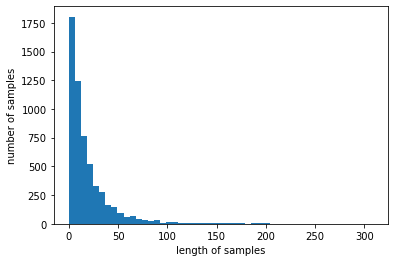

In [ ]:
print('Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :',max(len(review) for review in X_train))
print('Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä %s Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 50
below_threshold_len(max_len, X_train)

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 50 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 91.95663577548522


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print(len(X_test))
print(len(y_test))

1430
1430


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('hyol_model9.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
69/72 [===========================>..] - ETA: 0s - loss: 0.5989 - binary_accuracy: 0.7140

72/72 [==============================] - 10s 20ms/step - loss: 0.5976 - binary_accuracy: 0.7148 - val_loss: 0.4821 - val_binary_accuracy: 0.8042
Epoch 2/15
69/72 [===========================>..] - ETA: 0s - loss: 0.4102 - binary_accuracy: 0.8247

72/72 [==============================] - 1s 9ms/step - loss: 0.4114 - binary_accuracy: 0.8221 - val_loss: 0.4579 - val_binary_accuracy: 0.7998
Epoch 3/15
70/72 [============================>.] - ETA: 0s - loss: 0.3345 - binary_accuracy: 0.8679

72/72 [==============================] - 1s 10ms/step - loss: 0.3353 - binary_accuracy: 0.8673 - val_loss: 0.4900 - val_binary_accuracy: 0.7972
Epoch 4/15
70/72 [============================>.] - ETA: 0s - loss: 0.2840 - binary_accuracy: 0.8879

72/72 [==============================] - 1s 9ms/step - loss: 0.2845 - binary_accuracy: 0.8872 - val_loss: 0.5210 - val_binary_accuracy: 0.7867
Epoch 5/15
69/72 [===========================>..] - ETA: 0s - loss: 0.2457 - binary_accuracy: 0.9010

72/72 [==============================] - 1s 9ms/step - loss: 0.2475 - binary_accuracy: 0.9010 - val_loss: 0.5430 - val_binary_accuracy: 0.7955
Epoch 6/15
71/72 [============================>.] - ETA: 0s - loss: 0.2158 - binary_accuracy: 0.9173

72/72 [==============================] - 1s 9ms/step - loss: 0.2158 - binary_accuracy: 0.9174 - val_loss: 0.5709 - val_binary_accuracy: 0.7885
Epoch 6: early stopping


In [ ]:
print(model.layers[0].get_weights()[0])

[[ 0.00233415 -0.01878437 -0.03021345 ...  0.05869    -0.02955328
   0.00088074]
 [ 0.00401106  0.02676569  0.00324941 ... -0.0335274  -0.02646459
  -0.03101581]
 [-0.06491572  0.06320453  0.02902204 ... -0.06633429 -0.0551218
  -0.055652  ]
 ...
 [ 0.03013204  0.03862696  0.03221453 ...  0.00137986 -0.00316714
  -0.00389402]
 [-0.00916102  0.00987444 -0.02645557 ...  0.03388994 -0.02613549
   0.03965287]
 [ 0.00419389 -0.04987378  0.00659305 ...  0.01387069  0.00497102
   0.02707377]]


In [ ]:
#model.save('review_model')
model.save('review_model.h5')

In [ ]:
#loaded_model = load_model('review_model')
loaded_model = load_model('review_model.h5')

print("\n ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

45/45 [==============================] - 1s 4ms/step - loss: 0.5178 - binary_accuracy: 0.7790

 ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.7790


In [ ]:
import pickle
with open('tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer, handle)

# **ÌÖåÏä§Ìä∏ ÌïòÍ∏∞**
Îü∞ÌÉÄÏûÑ Îã§ÏãúÏãúÏûëÌõÑ Ïã§Ìñâ

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.4 MB 646 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 465 kB 65.3 MB/s 


In [ ]:
import pickle
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

In [ ]:
filepath = '~/content/hyol_model3.h5'

In [ ]:
#loaded_model = load_model('review_model')
loaded_model = load_model(filepath)

OSError: ignored

In [ ]:
print(loaded_model.layers[0].get_weights()[0])

[[ 0.00233415 -0.01878437 -0.03021345 ...  0.05869    -0.02955328
   0.00088074]
 [ 0.00401106  0.02676569  0.00324941 ... -0.0335274  -0.02646459
  -0.03101581]
 [-0.06491572  0.06320453  0.02902204 ... -0.06633429 -0.0551218
  -0.055652  ]
 ...
 [ 0.03013204  0.03862696  0.03221453 ...  0.00137986 -0.00316714
  -0.00389402]
 [-0.00916102  0.00987444 -0.02645557 ...  0.03388994 -0.02613549
   0.03965287]
 [ 0.00419389 -0.04987378  0.00659305 ...  0.01387069  0.00497102
   0.02707377]]


In [ ]:
okt = Okt()
stopwords = ['Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Îì§', 'Îäî', 'Ï¢Ä', 'Ïûò', 'Í±ç', 'Í≥º', 'ÎèÑ', 'Î•º', 'ÏúºÎ°ú', 'Ïûê', 'Ïóê', 'ÏôÄ', 'Ìïú', 'ÌïòÎã§','Î°ú','Í≤É','Í≥†','Ïõê']
max_len = 50

In [ ]:
with open('tokenizer.pickle','rb') as handle:
  tokenizer = pickle.load(handle)

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]','', new_sentence)
  print(new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True)
  print(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  print(new_sentence)
  encoded = tokenizer.texts_to_sequences([new_sentence])
  print(encoded)
  pad_new = pad_sequences(encoded, maxlen = max_len)
  print(pad_new)
  score = float(loaded_model.predict(pad_new))
  print(score)
  if(score >= 0.8):
    print("{:.2f}% ÌôïÎ•†Î°ú 5Ï†ê Î¶¨Î∑∞ÏûÖÎãàÎã§.\n".format(score * 100))
  elif (0.8 >score > 0.6):
    print("{:.2f}% ÌôïÎ•†Î°ú 4Ï†ê Î¶¨Î∑∞ÏûÖÎãàÎã§.\n".format(score * 100))
  elif (0.6 >score > 0.4):
    print("{:.2f}% ÌôïÎ•†Î°ú 3Ï†ê Î¶¨Î∑∞ÏûÖÎãàÎã§.\n".format((1 - score) * 100))
  elif (0.4 >score > 0.2):
    print("{:.2f}% ÌôïÎ•†Î°ú 2Ï†ê Î¶¨Î∑∞ÏûÖÎãàÎã§.\n".format((1 - score) * 100))
  else :
    print("{:.2f}% ÌôïÎ•†Î°ú 1Ï†ê Î¶¨Î∑∞ÏûÖÎãàÎã§.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('ÎçîÎüΩÍ≥† ÏµúÏïÖ. Î∂àÌé∏Ìï®. Í∑∏Î¶¨Í≥† ÏßÅÏõêÎì§ Ïã∏Í∞ÄÏßÄÏóÜÏùå.')

ÎçîÎüΩÍ≥† ÏµúÏïÖ Î∂àÌé∏Ìï® Í∑∏Î¶¨Í≥† ÏßÅÏõêÎì§ Ïã∏Í∞ÄÏßÄÏóÜÏùå
['ÎçîÎüΩÎã§', 'ÏµúÏïÖ', 'Î∂àÌé∏ÌïòÎã§', 'Í∑∏Î¶¨Í≥†', 'ÏßÅÏõê', 'Îì§', 'Ïã∏Í∞ÄÏßÄ', 'ÏóÜÎã§']
['ÎçîÎüΩÎã§', 'ÏµúÏïÖ', 'Î∂àÌé∏ÌïòÎã§', 'Í∑∏Î¶¨Í≥†', 'ÏßÅÏõê', 'Ïã∏Í∞ÄÏßÄ', 'ÏóÜÎã§']
[[417, 120, 199, 107, 12, 337, 4]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 417 120 199 107  12 337   4]]
1/1 [==============================] - 2s 2s/step
0.0020884580444544554
99.79% ÌôïÎ•†Î°ú 1Ï†ê Î¶¨Î∑∞ÏûÖÎãàÎã§.

